# Generate a rich prompt with an LLM, then the image with Stable Diffusion

## Init stable diffusion

In [1]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, StableDiffusionUpscalePipeline
import torch

def initdiffusionpipeline(model_id):
    # Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cuda")
    return pipe

diffusionpipeline=initdiffusionpipeline("stabilityai/stable-diffusion-2-1")


C:\Users\key\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
text_encoder\model.safetensors not found


In [2]:
import re
def generateimage(prompt,seed=42):
    generator = torch.Generator("cuda").manual_seed(seed)
    image = diffusionpipeline(prompt,generator=generator).images[0]
    cleanprompt = re.sub("( |,)", '-', prompt)[:20]
    fname = f"images/{cleanprompt}.png"
    image.save(fname)
    display(image)
    return image

## Init LLM

In [3]:
from langchain.llms import HuggingFaceHub
from langchain import PromptTemplate, LLMChain
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv()) # take environment variables from .env.
assert os.environ.get("HUGGINGFACEHUB_API_TOKEN") is not None

In [4]:
def initllm(model_id):
    # See https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads for some other options
    return HuggingFaceHub(repo_id=model_id, model_kwargs={"temperature": 0.1, "max_length": 64})

# search LLMs for stable diffusion prompting:
# https://huggingface.co/models?search=stable%20diffusion%20prompt
# llmchain = initllmchain("DrishtiSharma/StableDiffusion-Prompt-Generator-GPT-Neo-125M")
llm = initllm("Ar4ikov/gpt2-650k-stable-diffusion-prompt-generator")

In [5]:
def generateprompt(basicprompt):
    betterprompt = llm(basicprompt)
    print(betterprompt)
    return betterprompt

## Run

In [6]:
myprompt = "a photo of an astronaut riding a horse on mars"

100%|██████████| 50/50 [00:08<00:00,  5.68it/s]


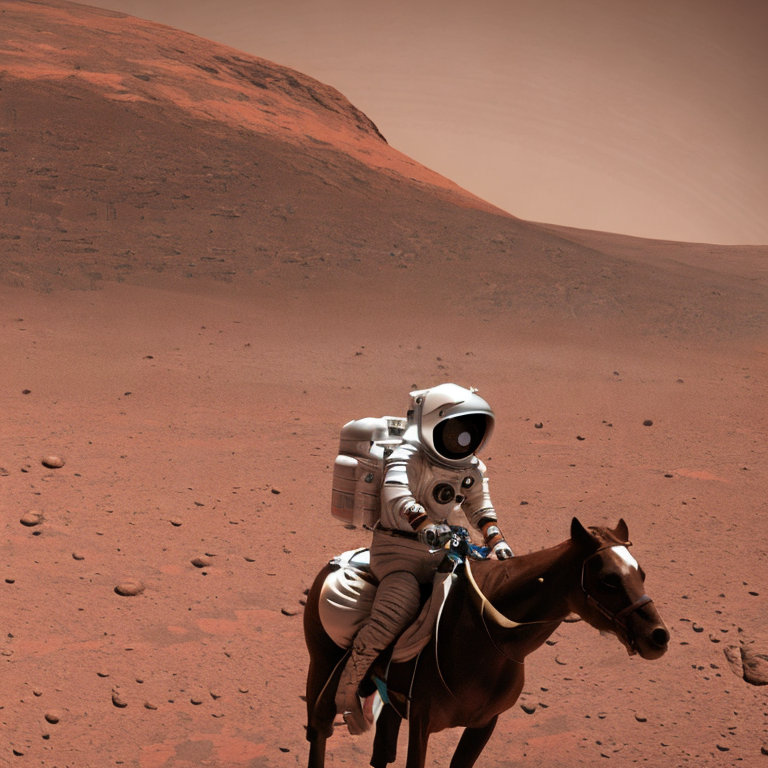

In [7]:

img = generateimage(myprompt)

In [8]:
betterprompt = myprompt + generateprompt(myprompt)

, digital art, trending on artstation, 4k, 8k, hd, high quality, high resolution, hdr, award winning. a beautiful painting of a beautiful woman with a beautiful face, by greg rutkowski, trending on artstation,


100%|██████████| 50/50 [00:18<00:00,  2.73it/s]


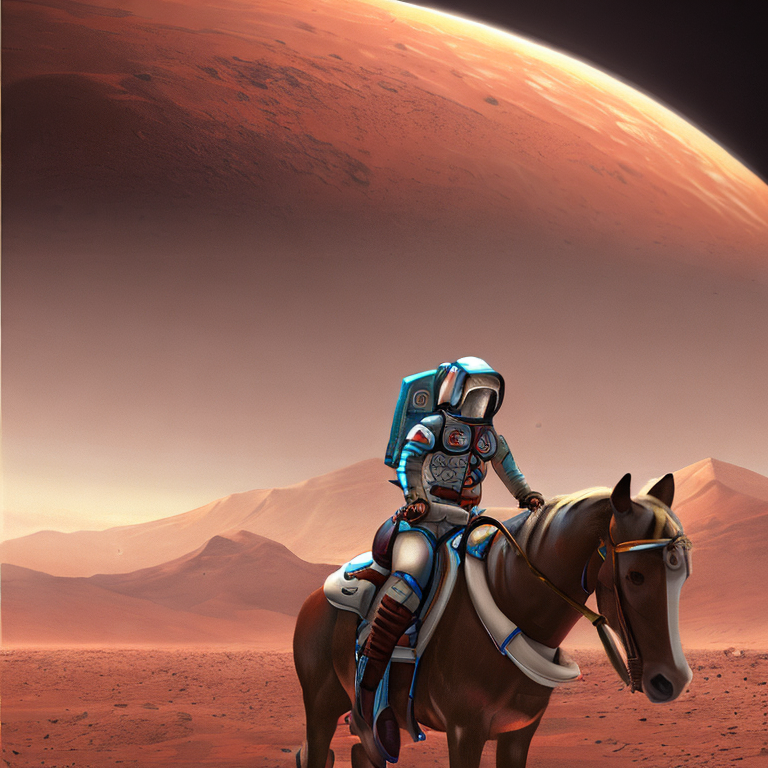

In [9]:
betterimg = generateimage(betterprompt)

# Using utils

unet\diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]


an astronaut riding a horse on mars, digital art, trending on artstation, highly detailed, intricate, sharp focus, digital art, 8 k. a beautiful painting of a beautiful woman with a beautiful face, by greg rutkowski, trending on artstation, artstationhd, artstationhq, unreal


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


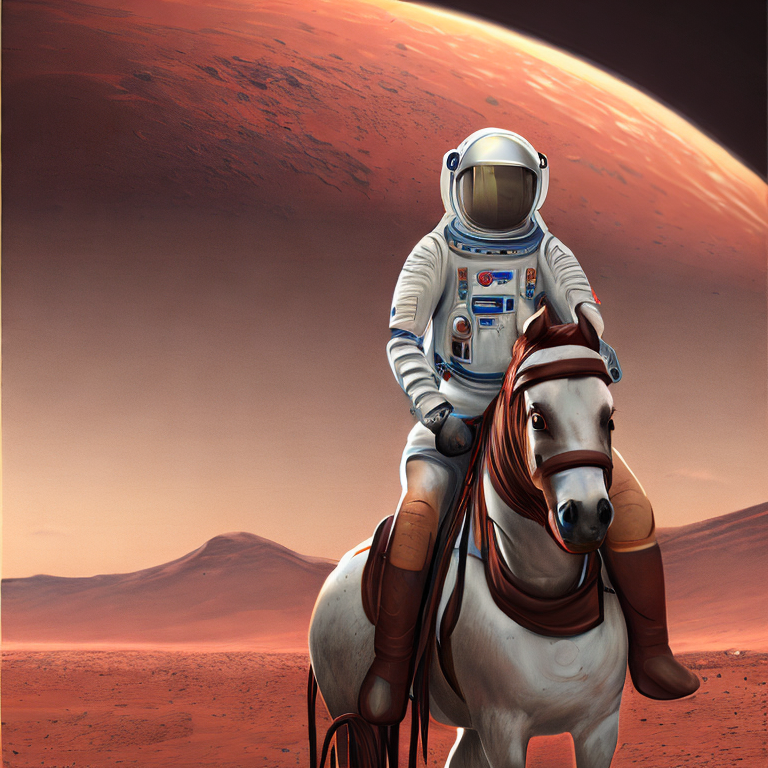

In [2]:
from utils_stablediffusion import simplePipeline
from utils_prompt import generate_prompt
pipe = simplePipeline()
image = pipe.generate(generate_prompt("an astronaut riding a horse on mars"))
display(image)
